In [ ]:
import pandas as pd
import numpy as np
import seaborn as sbn
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Step 1: Load data
data = {
    'Name': ['joe', 'devi', 'asha', 'Shinku', 'Rahul'],
    'Age': [18, 20, 19, 22, 25],
    'Salary': [25000, 30000, 35000, 45000, 40000],
    'Height': [165, 170, 180, 160, 175]
}
df = pd.DataFrame(data)
print("Original DataFrame:\n", df)

Original DataFrame:
      Name  Age  Salary  Height
0     joe   18   25000     165
1    devi   20   30000     170
2    asha   19   35000     180
3  Shinku   22   45000     160
4   Rahul   25   40000     175


In [ ]:
print("\nData Info:")
print(df.info())

print("\nDescriptive Statistics:")
print(df.describe())



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    5 non-null      object
 1   Age     5 non-null      int64 
 2   Salary  5 non-null      int64 
 3   Height  5 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 292.0+ bytes
None

Descriptive Statistics:
             Age       Salary      Height
count   5.000000      5.00000    5.000000
mean   20.800000  35000.00000  170.000000
std     2.774887   7905.69415    7.905694
min    18.000000  25000.00000  160.000000
25%    19.000000  30000.00000  165.000000
50%    20.000000  35000.00000  170.000000
75%    22.000000  40000.00000  175.000000
max    25.000000  45000.00000  180.000000


In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())

print("\nDuplicate Rows:", df.duplicated().sum())


Missing Values:
Name      0
Age       0
Salary    0
Height    0
dtype: int64

Duplicate Rows: 0


In [ ]:
Q1 = df[['Age', 'Salary', 'Height']].quantile(0.25)
Q3 = df[['Age', 'Salary', 'Height']].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[['Age', 'Salary', 'Height']] < (Q1 - 1.5 * IQR)) |
            (df[['Age', 'Salary', 'Height']] > (Q3 + 1.5 * IQR)))

print("\nOutliers Detected:")
print(outliers)


Outliers Detected:
     Age  Salary  Height
0  False   False   False
1  False   False   False
2  False   False   False
3  False   False   False
4  False   False   False


<Axes: ylabel='Salary'>

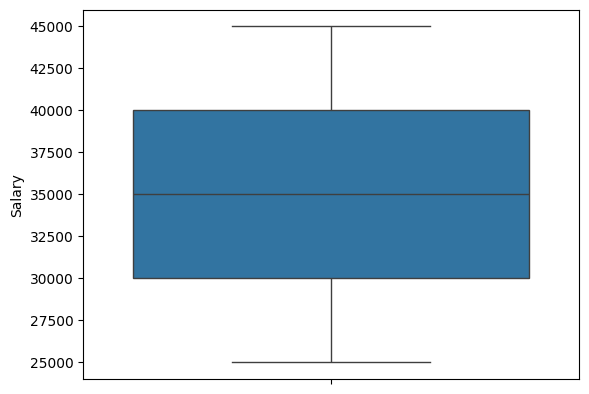

In [ ]:
#outliear
sbn.boxplot(df['Salary'])

<Axes: ylabel='Age'>

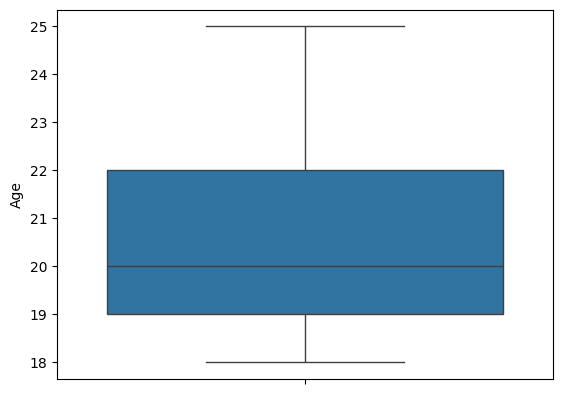

In [ ]:
#outliear
sbn.boxplot(df['Age'])

<Axes: ylabel='Height'>

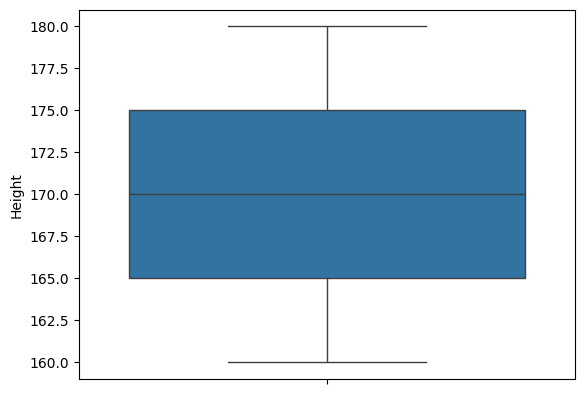

In [ ]:
#outliear
sbn.boxplot(df['Height'])

In [ ]:
df_normalized = df.copy()
cols = ['Age', 'Salary', 'Height']
df_normalized[cols] = (df[cols] - df[cols].min()) / (df[cols].max() - df[cols].min())

print("\nNormalized DataFrame:")
print(df_normalized)



Normalized DataFrame:
     Name       Age  Salary  Height
0     joe  0.000000    0.00    0.25
1    devi  0.285714    0.25    0.50
2    asha  0.142857    0.50    1.00
3  Shinku  0.571429    1.00    0.00
4   Rahul  1.000000    0.75    0.75


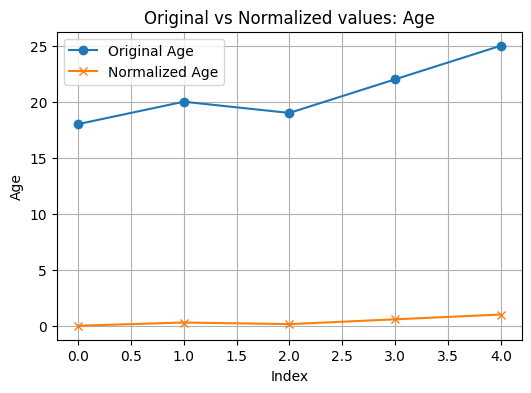

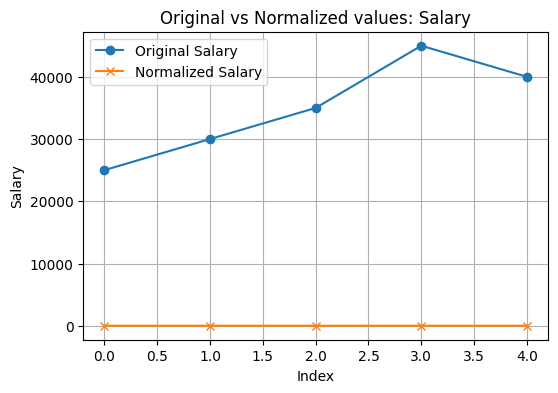

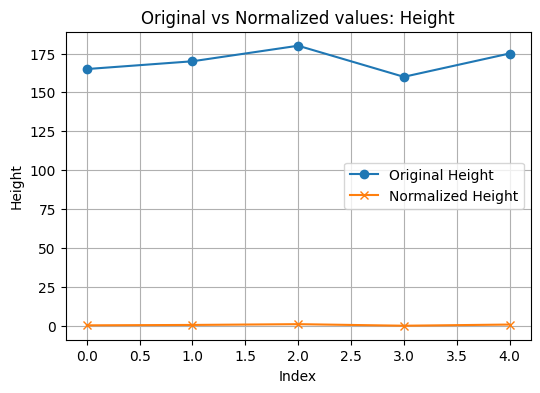

In [ ]:
import matplotlib.pyplot as plt

for col in cols:
    plt.figure(figsize=(6, 4))
    plt.plot(df[col], label='Original ' + col, marker='o')
    plt.plot(df_normalized[col], label='Normalized ' + col, marker='x')
    plt.title(f'Original vs Normalized values: {col}')
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
df_standardized = df.copy()
df_standardized[cols] = (df[cols] - df[cols].mean()) / df[cols].std()

print("\nStandardized DataFrame:")
print(df_standardized)


Standardized DataFrame:
     Name       Age    Salary    Height
0     joe -1.009050 -1.264911 -0.632456
1    devi -0.288300 -0.632456  0.000000
2    asha -0.648675  0.000000  1.264911
3  Shinku  0.432450  1.264911 -1.264911
4   Rahul  1.513575  0.632456  0.632456


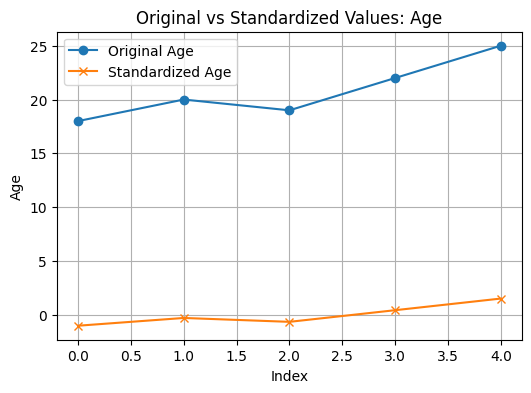

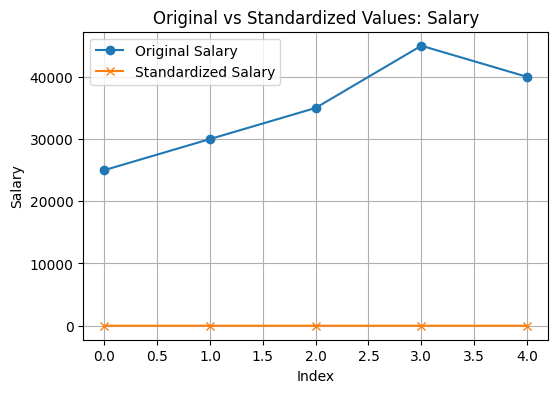

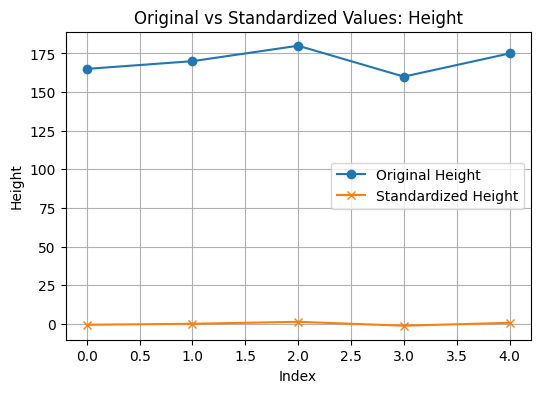

In [ ]:
import matplotlib.pyplot as plt

for col in cols:
    plt.figure(figsize=(6,4))
    plt.plot(df[col], label='Original ' + col, marker='o')
    plt.plot(df_standardized[col], label='Standardized ' + col, marker='x')
    plt.title(f'Original vs Standardized Values: {col}')
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
scaler_minmax = MinMaxScaler()
scaler_std = StandardScaler()

df[['Age_Norm', 'Salary_Norm', 'Height_Norm']] = scaler_minmax.fit_transform(df[['Age', 'Salary', 'Height']])
df[['Age_Std', 'Salary_Std', 'Height_Std']] = scaler_std.fit_transform(df[['Age', 'Salary', 'Height']])


In [ ]:
df.head()

,Name,Age,Salary,Height,Age_Norm,Salary_Norm,Height_Norm,Age_Std,Salary_Std,Height_Std
0,joe,18,25000,165,0.000000,0.00,0.25,-1.128152,-1.414214,-0.707107
1,devi,20,30000,170,0.285714,0.25,0.50,-0.322329,-0.707107,0.000000
2,asha,19,35000,180,0.142857,0.50,1.00,-0.725241,0.000000,1.414214
3,Shinku,22,45000,160,0.571429,1.00,0.00,0.483494,1.414214,-1.414214
4,Rahul,25,40000,175,1.000000,0.75,0.75,1.692228,0.707107,0.707107


# With Outliers**



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sbn
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Step 1: Load data
data = {
    'Name': ['joe', 'devi', 'asha', 'Shinku', 'Rahul'],
    'Age': [2, 20, 19, 22, 25],
    'Salary': [25000, 30000, 35000, 45000, 100000],
    'Height': [165, 170, 180, 160, 500]
}

df = pd.DataFrame(data)
print("Original DataFrame:\n", df)

Original DataFrame:
      Name  Age  Salary  Height
0     joe    2   25000     165
1    devi   20   30000     170
2    asha   19   35000     180
3  Shinku   22   45000     160
4   Rahul   25  100000     500


In [ ]:
print("\nData Info:")
print(df.info())

print("\nDescriptive Statistics:")
print(df.describe())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    5 non-null      object
 1   Age     5 non-null      int64 
 2   Salary  5 non-null      int64 
 3   Height  5 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 292.0+ bytes
None

Descriptive Statistics:
             Age         Salary     Height
count   5.000000       5.000000    5.00000
mean   17.600000   47000.000000  235.00000
std     9.016651   30536.862969  148.32397
min     2.000000   25000.000000  160.00000
25%    19.000000   30000.000000  165.00000
50%    20.000000   35000.000000  170.00000
75%    22.000000   45000.000000  180.00000
max    25.000000  100000.000000  500.00000


In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())

print("\nDuplicate Rows:", df.duplicated().sum())


Missing Values:
Name      0
Age       0
Salary    0
Height    0
dtype: int64

Duplicate Rows: 0


In [ ]:
Q1 = df[['Age', 'Salary', 'Height']].quantile(0.25)
Q3 = df[['Age', 'Salary', 'Height']].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[['Age', 'Salary', 'Height']] < (Q1 - 1.5 * IQR)) |
            (df[['Age', 'Salary', 'Height']] > (Q3 + 1.5 * IQR)))

print("\nOutliers Detected:")
print(outliers)


Outliers Detected:
     Age  Salary  Height
0   True   False   False
1  False   False   False
2  False   False   False
3  False   False   False
4  False    True    True


<Axes: ylabel='Salary'>

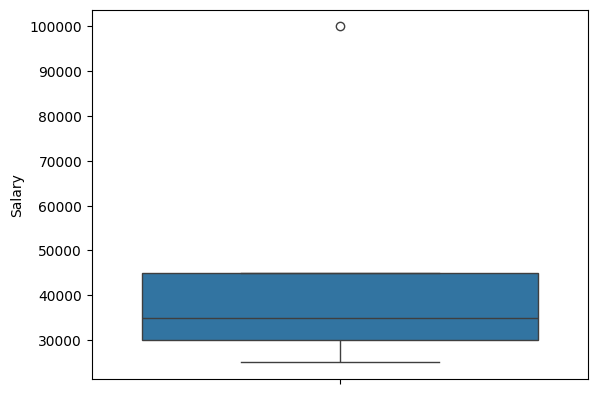

In [ ]:
#outliear
sbn.boxplot(df['Salary'])

<Axes: ylabel='Age'>

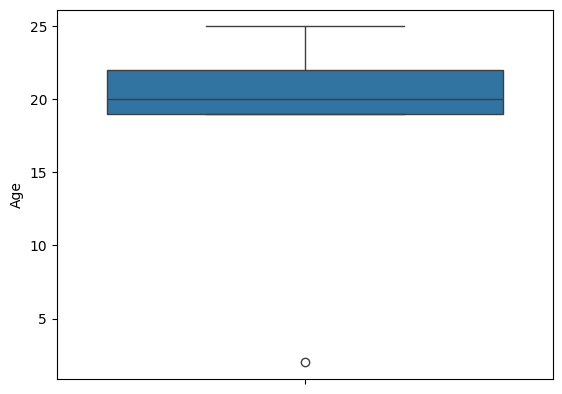

In [ ]:
#outliear
sbn.boxplot(df['Age'])

<Axes: ylabel='Height'>

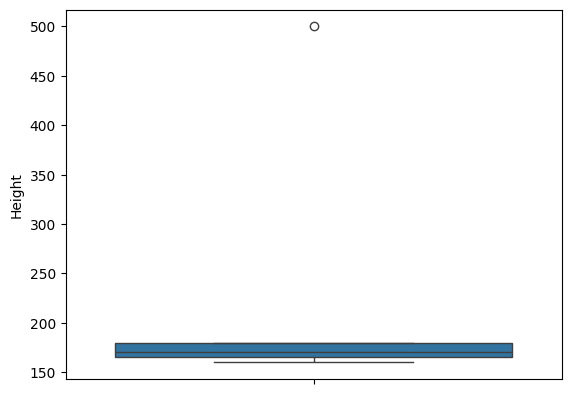

In [ ]:
#outliear
sbn.boxplot(df['Height'])

In [ ]:
df_normalized = df.copy()
cols = ['Age', 'Salary', 'Height']

df_normalized[cols] = (df[cols] - df[cols].min()) / (df[cols].max() - df[cols].min())

print("\nNormalized DataFrame:")
print(df_normalized)


Normalized DataFrame:
     Name       Age    Salary    Height
0     joe  0.000000  0.000000  0.014706
1    devi  0.782609  0.066667  0.029412
2    asha  0.739130  0.133333  0.058824
3  Shinku  0.869565  0.266667  0.000000
4   Rahul  1.000000  1.000000  1.000000


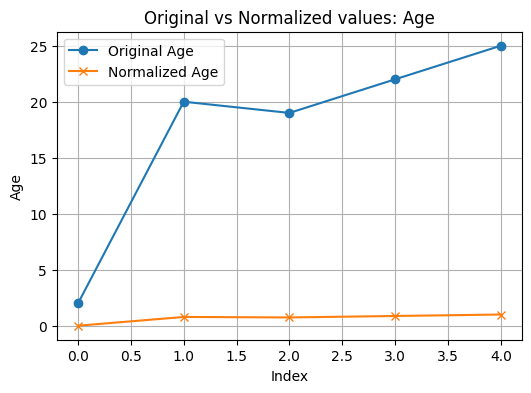

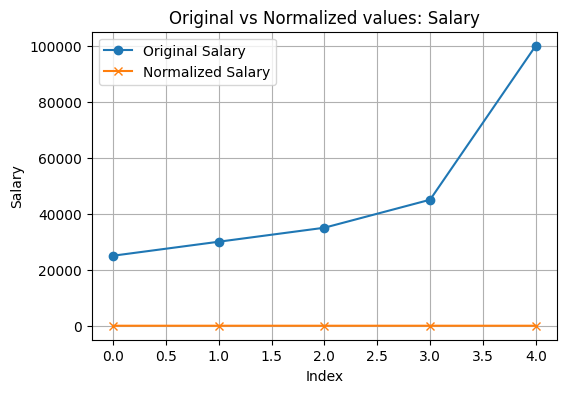

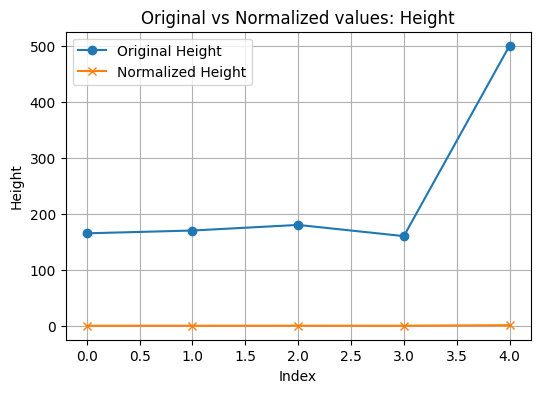

In [ ]:
import matplotlib.pyplot as plt

for col in cols:
    plt.figure(figsize=(6, 4))
    plt.plot(df[col], label='Original ' + col, marker='o')
    plt.plot(df_normalized[col], label='Normalized ' + col, marker='x')
    plt.title(f'Original vs Normalized values: {col}')
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
df.head()

,Name,Age,Salary,Height
0,joe,2,25000,165
1,devi,20,30000,170
2,asha,19,35000,180
3,Shinku,22,45000,160
4,Rahul,25,100000,500


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sbn
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Step 1: Load data
data = {
    'Name': ['joe', 'devi', 'asha', 'Shinku', 'Rahul', 'Rahul'],
    'Age': [18, 20, 19, 22,25,25],
    'Salary': [25000, 30000, 35000,40000, 45000,45000],
    'Height': [165, 170, 180, 160, 185,185 ]
}

df = pd.DataFrame(data)
print("Original DataFrame:\n", df)

Original DataFrame:
      Name  Age  Salary  Height
0     joe   18   25000     165
1    devi   20   30000     170
2    asha   19   35000     180
3  Shinku   22   40000     160
4   Rahul   25   45000     185
5   Rahul   25   45000     185


In [ ]:
print("\nData Info:")
print(df.info())

print("\nDescriptive Statistics:")
print(df.describe())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    6 non-null      object
 1   Age     6 non-null      int64 
 2   Salary  6 non-null      int64 
 3   Height  6 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 324.0+ bytes
None

Descriptive Statistics:
             Age        Salary      Height
count   6.000000      6.000000    6.000000
mean   21.500000  36666.666667  174.166667
std     3.016621   8164.965809   10.684880
min    18.000000  25000.000000  160.000000
25%    19.250000  31250.000000  166.250000
50%    21.000000  37500.000000  175.000000
75%    24.250000  43750.000000  183.750000
max    25.000000  45000.000000  185.000000


In [ ]:
 print("\nMissing Values:")
print(df.isnull().sum())

print("\nDuplicate Rows:", df.duplicated().sum())


Missing Values:
Name      0
Age       0
Salary    0
Height    0
dtype: int64

Duplicate Rows: 1
